# Pets Facial Expression Classification with EfficientNetB5
* Understanding pets' facial expressions is pivotal in animal behavior research and enhancing human-pet interactions. The project's goal is to create a dependable classifier using convolutional neural networks (CNNs), capable of identifying various pet expressions with precision.

## Introduction
* The model is based on the EfficientNetB5 architecture, known for its efficiency and effectiveness in image classification tasks. Employing a dataset named "Pets Facial Expression," consisting of 1000 images, and incorporating extensive data augmentation techniques like rotation and distortion, the model achieves a notable test accuracy of 93%.
* The primary difference in this model, aside from the EfficientNetB5 base model, lies in the image size 224 x 224, where given a larger size of pixels data the model would be able to learn a more refined detail than an image size of 128 x 128.
* The second difference is data augmentation. in previous models, no data rotation and distortion were applied onto exitsing data to create new data. This leads to the model being only able to identify undistored images. Yet with data augementation, the increased dataset where images are distorted, would enable the model to be more robust as it is also trained to indentify emotion from deformed signals.

## EfficientNetB5 Overview
EfficientNetB5 is part of the EfficientNet family, a group of models designed by Mingxing Tan and Quoc V. Le, which have set new benchmarks for efficiency and accuracy in image classification tasks. These models utilize a novel scaling method that uniformly scales all dimensions of depth, width, and resolution, leveraging a compound coefficient. EfficientNetB5, specifically, offers an optimal balance between performance and computational cost, making it a suitable choice for this task.

## Data Description
The dataset comprises 1000 images divided into 'Other', 'Angry', 'Sad', and 'Happy' classes, with an equitable distribution of 800 training, 120 validation, and 80 testing images.

## Methodology
- **Data Augmentation:** Data augmentation strategies, including rotation, distortion, and other techniques, are extensively used to enhance the model's generalization capability.
- **Model Architecture:**
  - **Base Model:** The EfficientNetB5, pre-trained on the ImageNet dataset, is employed for its proven efficiency in image classification.
  - **Additional Layers:** Layers like batch normalization, dense layers with ReLU activation and regularizers, and a dropout layer, are added post the base model.
  - **Output Layer:** A dense layer with softmax activation is tailored for the four classes.
- **Compilation and Callbacks:**
  - The model is compiled using the Adamax optimizer and categorical crossentropy loss function, focusing on accuracy.
  - Early Stopping and Learning Rate Scheduler are used as callbacks.
- **Training:** The model is trained for 100 epochs with a batch size of 16 using the augmented dataset.

## Results and Discussion
Achieving a test accuracy of 93.75%, the model's success is attributed to the EfficientNetB5 architecture and the diverse data augmentation techniques. The EfficientNetB5's ability to efficiently handle image classification tasks is evident in the high accuracy achieved. The balance in parameters underlines the model's adept adaptation for pet facial expression classification.

|            | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
| Angry      | 0.97      | 0.93   | 0.95     | 30      |
| Other      | 0.87      | 1.00   | 0.93     | 13      |
| Sad        | 0.95      | 0.90   | 0.92     | 20      |
| Happy      | 0.94      | 0.94   | 0.94     | 17      |
| **Accuracy**   |           |        | **0.94**    | 80      |
| **Macro Avg**  | 0.93      | 0.94   | 0.94     | 80      |
| **Weighted Avg**| 0.94      | 0.94   | 0.94     | 80      |

## Conclusion
This project illustrates the potential of deep learning, particularly using EfficientNetB5, in classifying pet facial expressions with high accuracy. It lays the groundwork for future research into more complex models, larger datasets, and real-world applications in animal behavior and veterinary sciences.

## References
- TensorFlow and Keras Documentation.
- EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks (Tan and Le, 2019).
- Data Augmentation Techniques in Deep Learning.

This report, enriched with an introduction to EfficientNetB5, reflects the model's high capability in accurately classifying pet facial expressions, as evidenced by the 93.75% test accuracy.

<div style="text-align: left; background-color:black; font-family: Trebuchet MS; color:#007ACC; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: green solid;"> Pet Facial Expression </div>

<center>
    <img src='https://dogexpress.in/wp-content/uploads/2017/07/Dogs-With-Funny-Facial-Expressions-1-660x330.jpg'>
</center>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="background-color:#007ACC;font-family:Trebuchet MS;color:#FFF9ED;font-size:150%;text-align:center;border-radius:9px 9px; padding: 15px; border-style: solid; border-color: black">TABLE OF CONTENTS</div>   
    
* [1. Introduction](#1)
    
* [2. Import Necessaries](#2)
    
* [3. EDA](#3)

    * [3.1. Define data path and dataset name](#3.1)
    * [3.2. Create Dataframe for the dataset](#3.2)
    * [3.3. Display Number of Examples in the dataset](#3.3)
    * [3.4. Display Number of Classes in the dataset](#3.4)
    * [3.5. Display count of images in each class of the dataset](#3.5)
    * [3.6. Visualize Each Class in the dataset](#3.6)
    * [3.7. Check Null values in the dataframe](#3.7)
    * [3.8. Visualize Null values](#3.8)
    
    
* [4. Split dataframe into train, valid, and test](#4)
     
* [5. Create Image Data Generator](#5)

* [6. Visualize Training dataset](#6)

* [7. Model Structure](#7)

    * [7.1. Generic Model Creation](#7.1)
    * [7.2. Define Early Stop](#7.2)
    * [7.3. Train model](#7.3)
    

* [8. Evaluate Model](#8)

    * [8.1. Plot accuarcy and loss curve](#8.1)
    * [8.2. Model Accuarcy](#8.2)
    * [8.3. Get Predictions](#8.3)
    

* [9. Save the Model](#9)

* [10. Load Model ](#10)



<a id="1"></a>
## <b>1 <span style='color:#B21010'>||</span> Introduction</b>

<div style="background-color:#007ACC;
            border-radius:9px 9px;
            border: black solid;
            padding: 15px;
            color:#FFF9ED;
            font-family:Trebuchet MS;
            font-size:150%;
            text-align: center">
<h3 style='border:0; border-radius: 5px; color: white'><center> STEPS </center></h3>
</div>
_________________________________________________________________________

    
1. Load the data by storing each image path in a list and its corresponding label in another list<br>
2. Transform the lists into dataframe<br>
3. EDA and analyze the data for more insights
4. Split the data into train, test and validation datasets<br>
5. Create Data Generator for Train, Test and validation datasets<br>
Tensorflow Generators are very useful to Generate batches of tensor image data with real-time data augmentation.<br>
6. Load the pretrained model, add some layers on top of its base layer and compile it<br>
We will be using EffiecentNet, of course you can use any pretrained model you want and tune its architecture and parameters!<br>
7. Evaluate the model by plotting acc and loss curves, plot confussion matrix and print classification report<br>
8. Save the model to use it in production<br>
9. Finally, Load the model and make predictions

<a id="2"></a>
## <b>2 <span style='color:#B21010'>||</span> Import Necessaries</b>

In [28]:
import os
import itertools

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


<a id="3"></a>
## <b>3 <span style='color:#B21010'>||</span> EDA</b>

<a id="3.1"></a>
### <b>3.1 <span style='color:#B21010'>||</span> Define data path and dataset name</b>

In [29]:
train_data_dir = 'pets_facial_expression_dataset/master/train'
valid_data_dir = 'pets_facial_expression_dataset/master/valid'
test_data_dir = 'pets_facial_expression_dataset/master/test'

data_dir = 'pets_facial_expression_dataset'


ds_name = 'Pets Facial Expression'

<a id="3.2"></a>
### <b>3.2 <span style='color:#B21010'>||</span> Create Dataframe for the dataset</b>

In [30]:
# Generate data paths with labels

def generate_data_paths(data_dir):
    
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        if fold == 'master':
            continue
            
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)
            
    return filepaths, labels


filepaths, labels = generate_data_paths(data_dir)

In [31]:
def create_df(filepaths, labels):

    Fseries = pd.Series(filepaths, name= 'filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis= 1)
    return df

df = create_df(filepaths, labels)

In [32]:
df.head()

,filepaths,labels
0,pets_facial_expression_dataset/happy/aug-70-08...,happy
1,pets_facial_expression_dataset/happy/aug-121-0...,happy
2,pets_facial_expression_dataset/happy/aug-78-09...,happy
3,pets_facial_expression_dataset/happy/aug-68-08...,happy
4,pets_facial_expression_dataset/happy/aug-8-012...,happy


<a id="3.3"></a>
### <b>3.3 <span style='color:#B21010'>||</span> Display Number of Examples in the dataset</b>

In [33]:
def num_of_examples(df, name='df'):
    print(f"The {name} dataset has {df.shape[0]} images.")
    
num_of_examples(df, ds_name)

The Pets Facial Expression dataset has 1000 images.


<a id="3.4"></a>
### <b>3.4 <span style='color:#B21010'>||</span> Display Number of Classes in the dataset</b>

In [34]:
def num_of_classes(df, name='df'):
    print(f"The {name} dataset has {len(df['labels'].unique())} classes")
    
num_of_classes(df, ds_name)

The Pets Facial Expression dataset has 4 classes


<a id="3.5"></a>
### <b>3.5 <span style='color:#B21010'>||</span> Display count of images in each class of the dataset</b>

In [35]:
def classes_count(df, name='df'):
    
    print(f"The {name} dataset has: ")
    print("="*70)
    print()
    for name in df['labels'].unique():
        num_class = len(df['labels'][df['labels'] == name])
        print(f"Class '{name}' has {num_class} images")
        print('-'*70)
        
classes_count(df, ds_name)

The Pets Facial Expression dataset has: 

Class 'happy' has 250 images
----------------------------------------------------------------------
Class 'Sad' has 250 images
----------------------------------------------------------------------
Class 'Other' has 250 images
----------------------------------------------------------------------
Class 'Angry' has 250 images
----------------------------------------------------------------------


<a id="3.6"></a>
### <b>3.6 <span style='color:#B21010'>||</span> Visualize Each Class in the dataset</b>

In [36]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=12, family='Trebuchet MS'),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=12, family='Trebuchet MS'),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top',
                             'font': dict(size=20, family='Trebuchet MS')},
                      template='plotly_white')

    iplot(fig)
    
    
colors = ['#0077be', '#009dc4', '#00b4d8', '#00cbe4', '#00e3ec', '#00faff']

cat_summary_with_graph(df,'labels')

<a id="3.7"></a>
### <b>3.7 <span style='color:#B21010'>||</span> Check Null values in the dataframe</b>

In [37]:
def check_null_values(df, name='df'):
    
    num_null_vals = sum(df.isnull().sum().values)
    
    if not num_null_vals:
        print(f"The {name} dataset has no null values")
    
    else:
        print(f"The {name} dataset has {num_null_vals} null values")
        print('-'*70)
        print('Total null values in each column:\n')
        print(df.isnull().sum())
        

check_null_values(df, ds_name)

The Pets Facial Expression dataset has no null values


<a id="3.8"></a>
### <b>3.8 <span style='color:#B21010'>||</span> Visualize Null values</b>

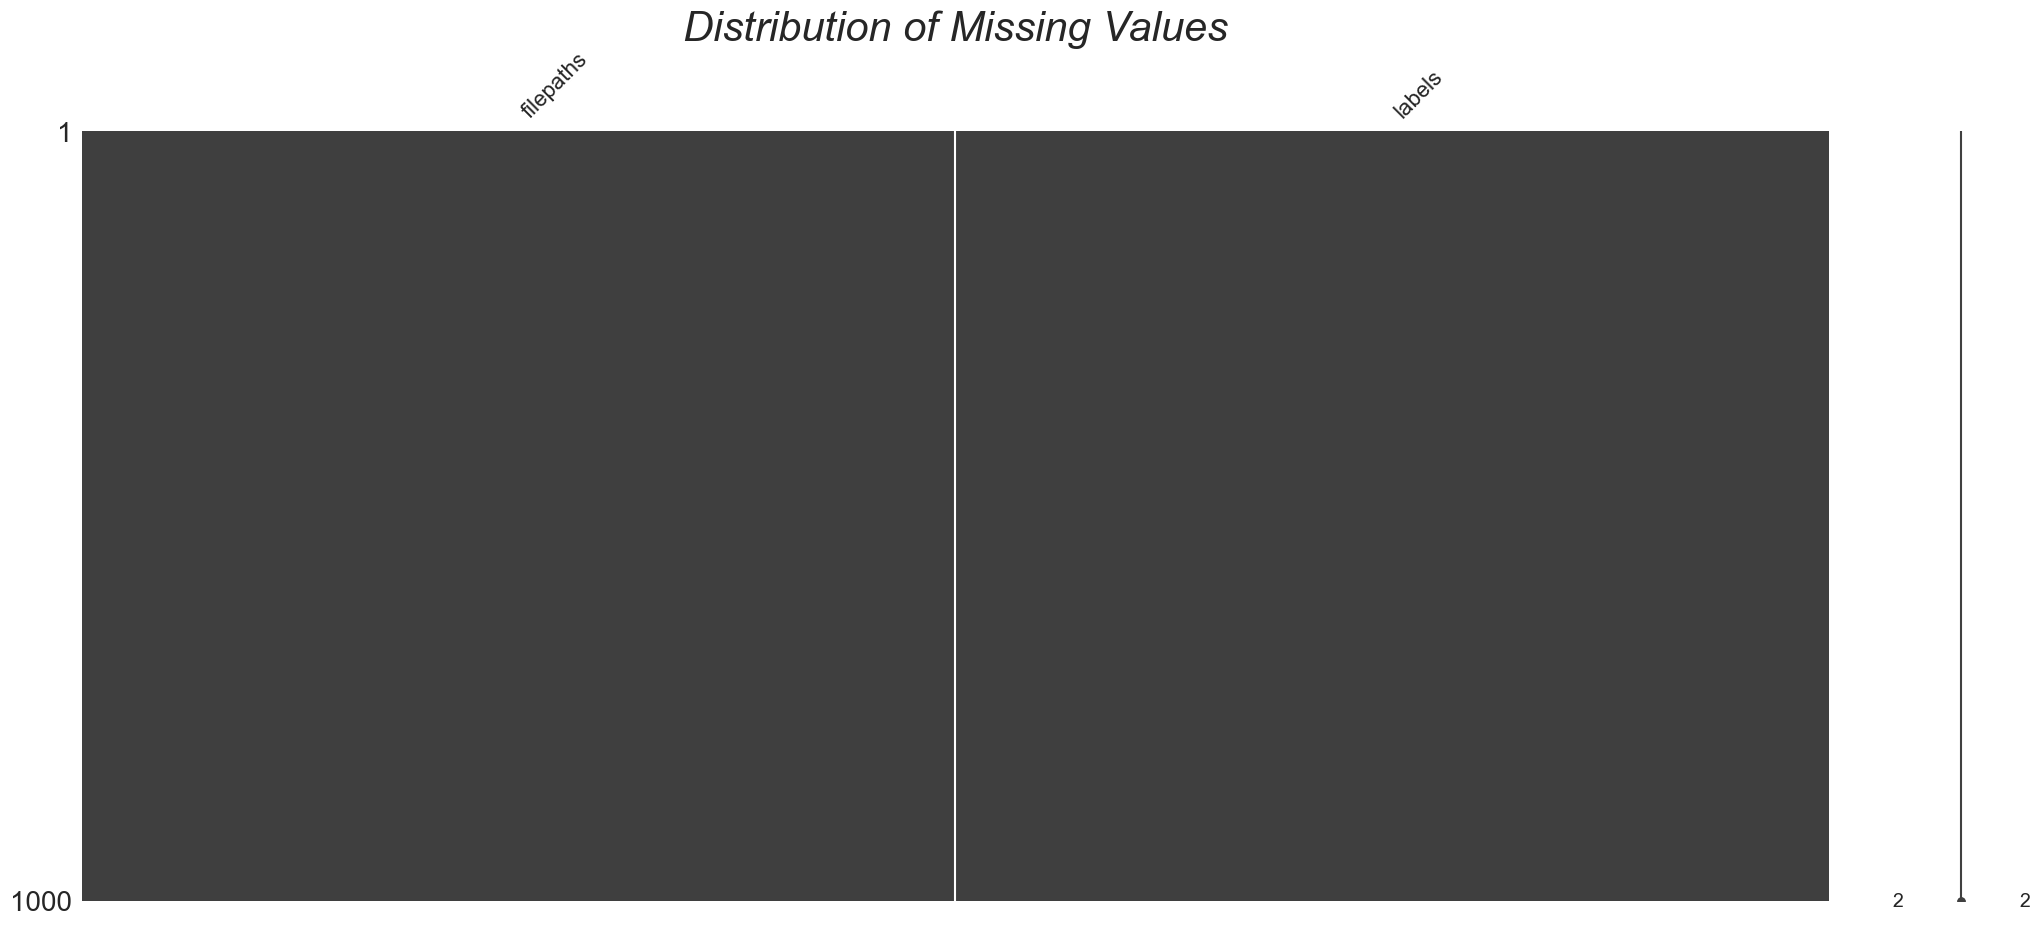

In [38]:
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');

<a id="4"></a>
## <b>4 <span style='color:#B21010'>||</span>Split dataframe into train, valid, and test</b>

In [39]:

# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)


In [ ]:
'''
filepaths, labels = generate_data_paths(train_data_dir)
train_df = create_df(filepaths, labels)

filepaths, labels = generate_data_paths(valid_data_dir)
valid_df = create_df(filepaths, labels)

filepaths, labels = generate_data_paths(test_data_dir)
test_df = create_df(filepaths, labels)
'''

In [40]:
num_of_examples(train_df, "Training "+ds_name)
num_of_examples(valid_df, "Validation "+ds_name)
num_of_examples(test_df, "Testing "+ds_name)

The Training Pets Facial Expression dataset has 800 images.
The Validation Pets Facial Expression dataset has 120 images.
The Testing Pets Facial Expression dataset has 80 images.


In [41]:
num_of_classes(train_df, "Training "+ds_name)
num_of_classes(valid_df, "Validation "+ds_name)
num_of_classes(test_df, "Testing "+ds_name)

The Training Pets Facial Expression dataset has 4 classes
The Validation Pets Facial Expression dataset has 4 classes
The Testing Pets Facial Expression dataset has 4 classes


In [42]:
classes_count(train_df, 'Training '+ds_name)

The Training Pets Facial Expression dataset has: 

Class 'Other' has 209 images
----------------------------------------------------------------------
Class 'Angry' has 192 images
----------------------------------------------------------------------
Class 'Sad' has 201 images
----------------------------------------------------------------------
Class 'happy' has 198 images
----------------------------------------------------------------------


In [43]:
classes_count(valid_df, 'Validation '+ds_name)

The Validation Pets Facial Expression dataset has: 

Class 'Sad' has 29 images
----------------------------------------------------------------------
Class 'Other' has 28 images
----------------------------------------------------------------------
Class 'happy' has 35 images
----------------------------------------------------------------------
Class 'Angry' has 28 images
----------------------------------------------------------------------


In [44]:
classes_count(test_df, 'Testing '+ds_name)

The Testing Pets Facial Expression dataset has: 

Class 'happy' has 17 images
----------------------------------------------------------------------
Class 'Sad' has 20 images
----------------------------------------------------------------------
Class 'Angry' has 30 images
----------------------------------------------------------------------
Class 'Other' has 13 images
----------------------------------------------------------------------


<a id="5"></a>
## <b>5 <span style='color:#B21010'>||</span>Create Image Data Generator</b>

In [46]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

train_gen = tr_gen.flow_from_dataframe(train_df, 
                                       x_col= 'filepaths', 
                                       y_col= 'labels', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= True, 
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, 
                                       x_col= 'filepaths', 
                                       y_col= 'labels', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= True, 
                                       batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe(test_df, 
                                      x_col= 'filepaths', 
                                      y_col= 'labels', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= 'rgb', 
                                      shuffle= False, 
                                      batch_size= test_batch_size)

Found 800 validated image filenames belonging to 4 classes.
Found 120 validated image filenames belonging to 4 classes.
Found 80 validated image filenames belonging to 4 classes.


<a id="6"></a>
## <b>6 <span style='color:#B21010'>||</span>Visualize Training dataset</b>

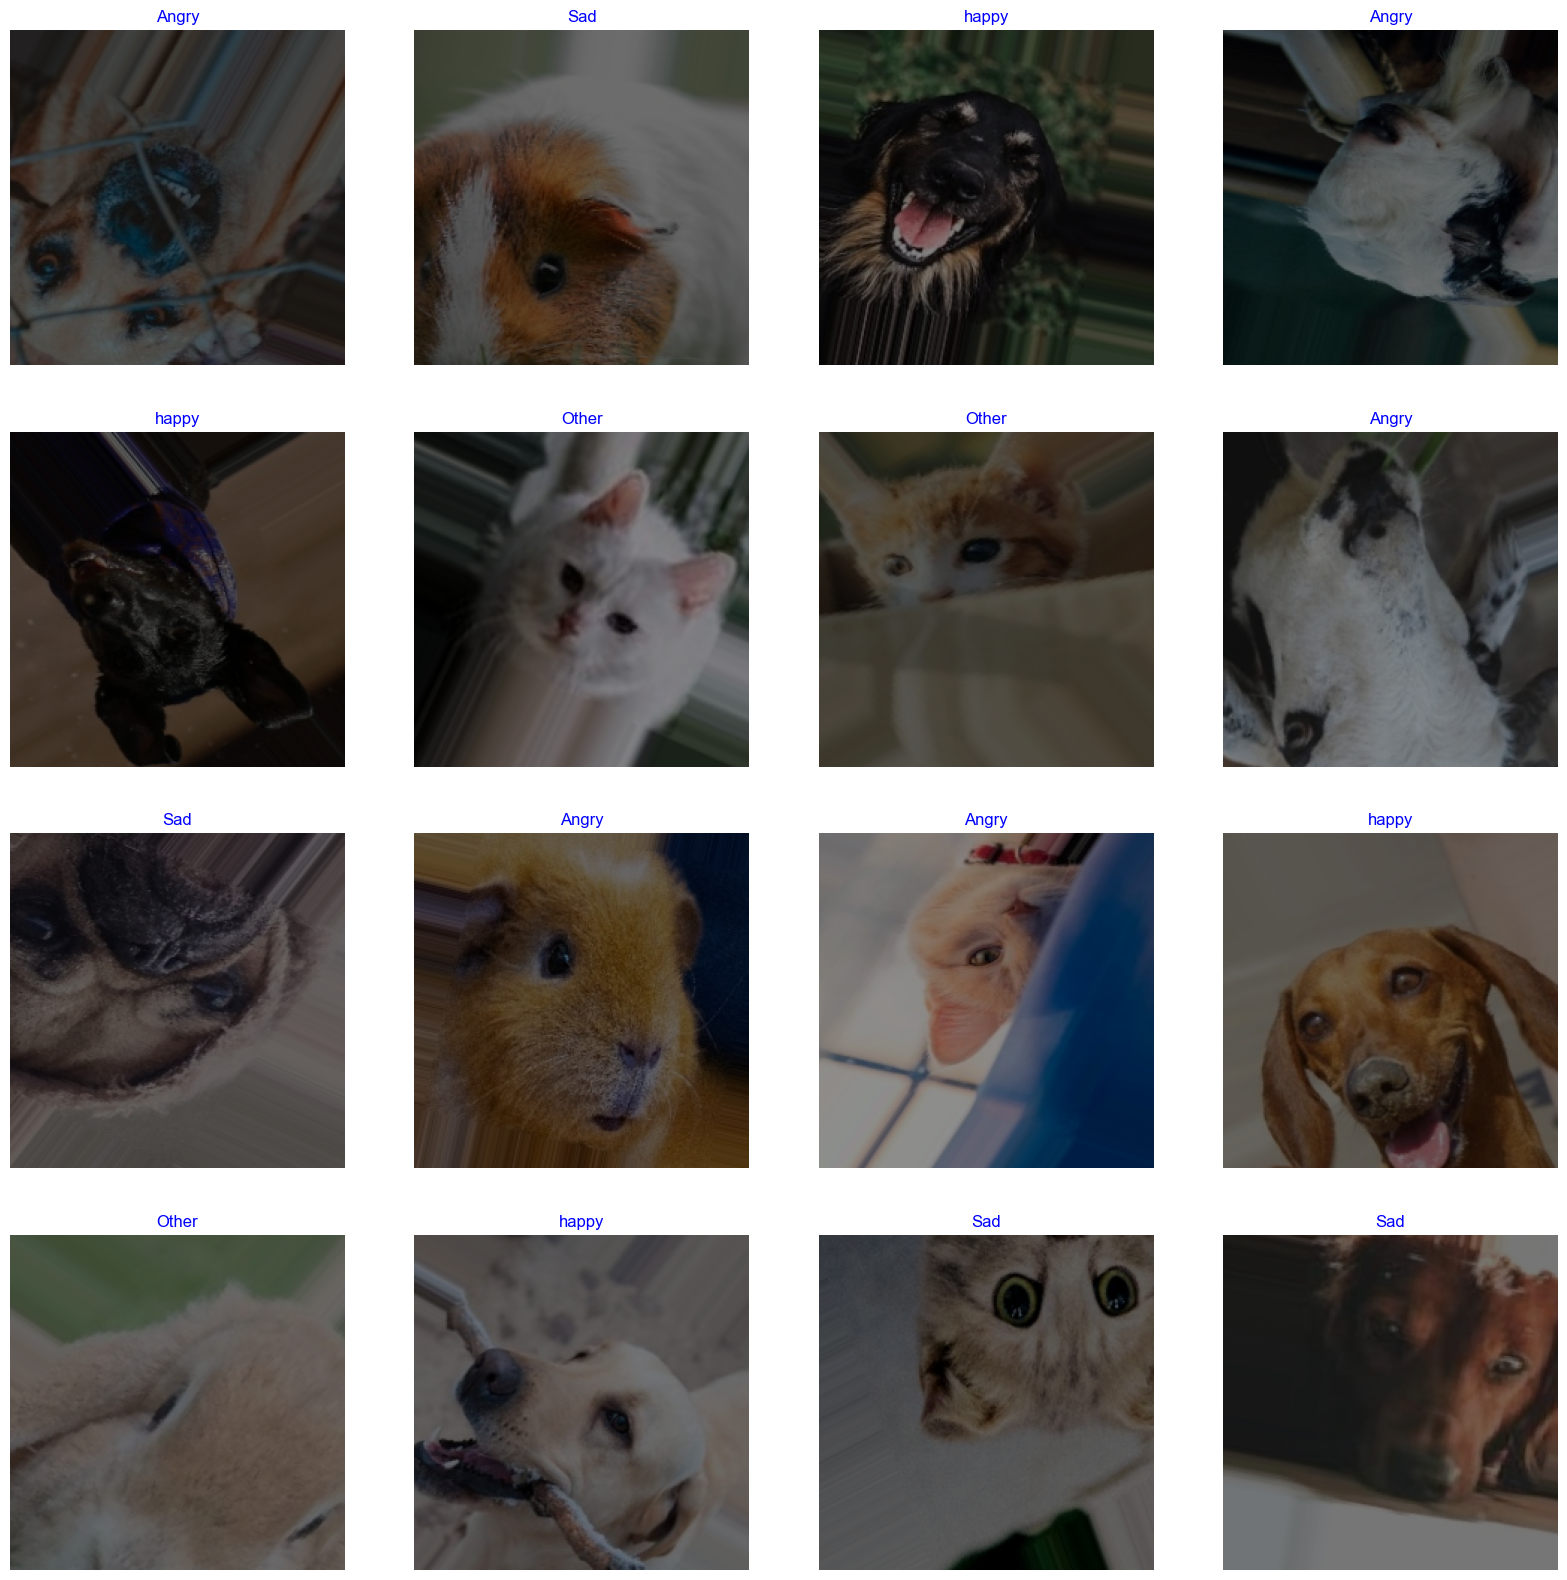

In [47]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
    
plt.show()

<a id="7"></a>
## <b>7 <span style='color:#B21010'>||</span>Model Structure</b>

<a id="7.1"></a>
### <b>7.1 <span style='color:#B21010'>||</span>Generic Model Creation</b>

In [48]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, activation='relu'),
    Dense(128, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional  (None, 2048)              28513527  
 )                                                               
                                                                 
 batch_normalization_1 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 256)               524544    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                

<a id="7.2"></a>
### <b>7.2 <span style='color:#B21010'>||</span>Define Early Stop</b>

In [49]:
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=5, 
                               restore_best_weights=True,
                               mode='max',
                              )

def step_decay(epoch):
    
     initial_lrate = 0.1
     drop = 0.5
     epochs_drop = 10.0
     lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
     return lrate

lr_scheduler = LearningRateScheduler(step_decay)

<a id="7.3"></a>
### <b>7.3 <span style='color:#B21010'>||</span>Train Model</b>

In [50]:
batch_size = 16   # set batch size for training
epochs = 100   # number of all epochs in training

history = model.fit(x=train_gen,
                    epochs= epochs,
                    verbose= 1,
                    validation_data= valid_gen, 
                    validation_steps= None,
                    shuffle= False)

Epoch 1/100
50/50 [==============================] - 143s 2s/step - loss: 4.3205 - accuracy: 0.3887 - val_loss: 4.2870 - val_accuracy: 0.4333
Epoch 2/100
50/50 [==============================] - 113s 2s/step - loss: 3.7088 - accuracy: 0.5263 - val_loss: 3.6994 - val_accuracy: 0.5250
Epoch 3/100
50/50 [==============================] - 106s 2s/step - loss: 3.5205 - accuracy: 0.5238 - val_loss: 3.4347 - val_accuracy: 0.5917
Epoch 4/100
50/50 [==============================] - 101s 2s/step - loss: 3.2991 - accuracy: 0.5587 - val_loss: 3.2088 - val_accuracy: 0.6667
Epoch 5/100
50/50 [==============================] - 100s 2s/step - loss: 3.1434 - accuracy: 0.5900 - val_loss: 3.1284 - val_accuracy: 0.6250
Epoch 6/100
50/50 [==============================] - 123s 2s/step - loss: 2.9849 - accuracy: 0.6400 - val_loss: 2.9961 - val_accuracy: 0.5833
Epoch 7/100
50/50 [==============================] - 108s 2s/step - loss: 2.8432 - accuracy: 0.6363 - val_loss: 2.8133 - val_accuracy: 0.6500
Epoch 

<a id="8"></a>
## <b>8 <span style='color:#B21010'>||</span>Evaluate Model</b>

<a id="8.1"></a>
### <b>8.1 <span style='color:#B21010'>||</span>Plot accuarcy and loss curve </b>

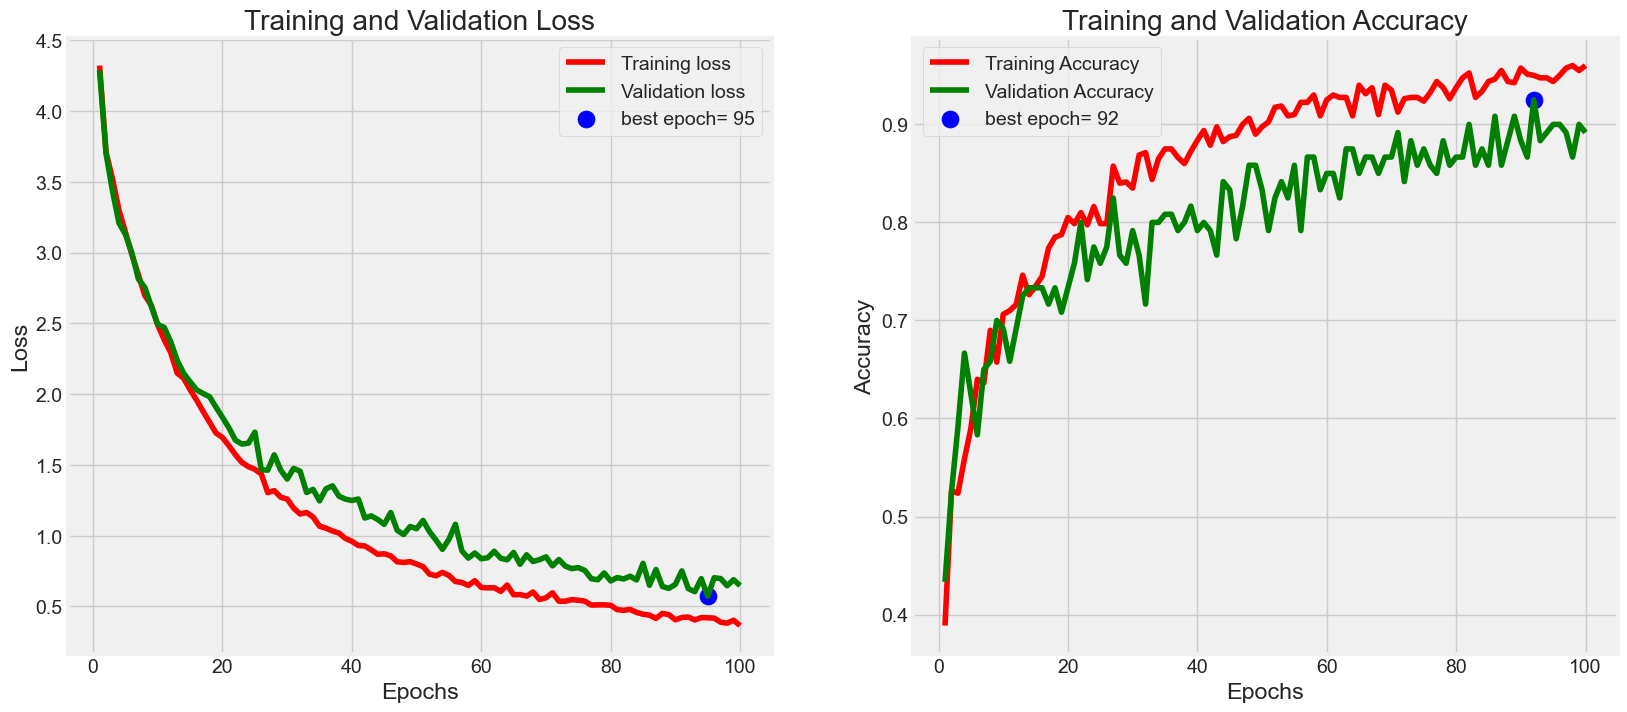

In [51]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

<a id="8.2"></a>
### <b>8.2 <span style='color:#B21010'>||</span>Model Accuarcy</b>

In [52]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1/1 [==============================] - 11s 11s/step - loss: 0.5418 - accuracy: 0.9250
Train Loss:  0.3591211438179016
Train Accuracy:  0.9375
--------------------
Test Loss:  0.5418062210083008
Test Accuracy:  0.925000011920929


<a id="8.3"></a>
### <b>8.3 <span style='color:#B21010'>||</span>Get Prediction</b>

In [53]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

<a id="8.4"></a>
### <b>8.4 <span style='color:#B21010'>||</span>Confussion Matrix</b>

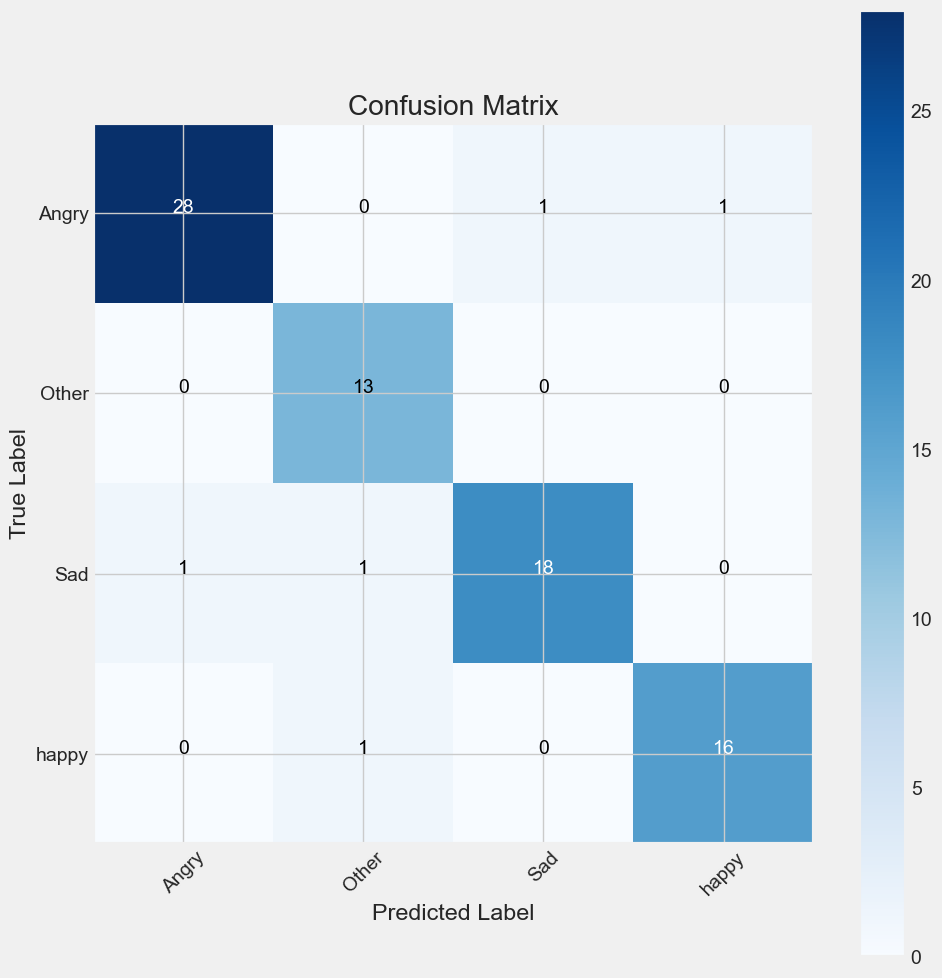

In [54]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

<a id="8.5"></a>
### <b>8.5 <span style='color:#B21010'>||</span>Classification Report</b>

In [55]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

       Angry       0.97      0.93      0.95        30
       Other       0.87      1.00      0.93        13
         Sad       0.95      0.90      0.92        20
       happy       0.94      0.94      0.94        17

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



<a id="9"></a>
## <b>9 <span style='color:#B21010'>||</span>Save the Model</b>

In [56]:
model.save_weights('efficientNetB5_pet_emotion_model.h5')

<a id="10"></a>
## <b>10 <span style='color:#B21010'>||</span>Load the model and Predict the Inputs</b>

1/1 [==============================] - 4s 4s/step


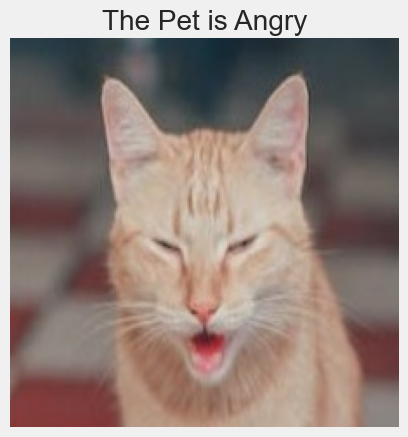

In [57]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_and_display(image_path, model):
    
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    
    class_indices = train_gen.class_indices
    class_labels = list(class_indices.keys())
    predicted_class_label = class_labels[predicted_class_index]
    
    plt.imshow(img)
    plt.axis('off')
    if predicted_class_label == 'Other':
        plt.title(f"The pet is normal")
    else:
        plt.title(f"The Pet is {predicted_class_label}")
    plt.show()

model.load_weights('efficientNetB5_pet_emotion_model.h5')

class_labels = ['Angry', 'Other', 'Sad', 'Happy']

# Replace 'path_to_test_image' with the path to the image you want to test
image_path_to_test = 'pets_facial_expression_dataset/Angry/02.jpg'
predict_and_display(image_path_to_test, model)

1/1 [==============================] - 0s 212ms/step


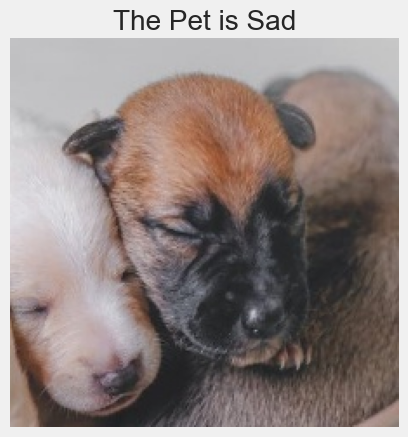

In [58]:
image_path_to_test = 'pets_facial_expression_dataset/Sad/031.jpg'
predict_and_display(image_path_to_test, model)

1/1 [==============================] - 0s 295ms/step


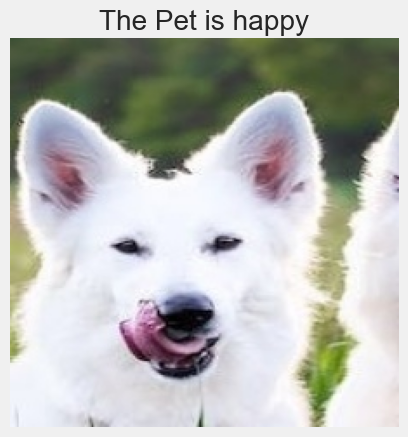

In [59]:
image_path_to_test = 'pets_facial_expression_dataset/happy/032.jpg'
predict_and_display(image_path_to_test, model)

1/1 [==============================] - 0s 238ms/step


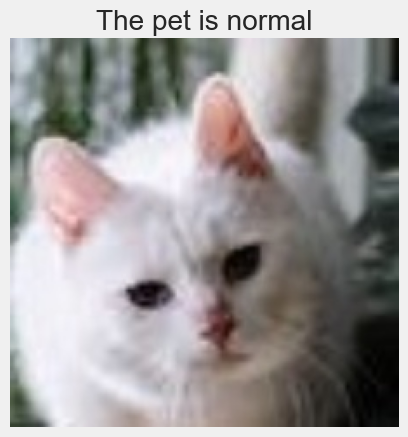

In [60]:
image_path_to_test = 'pets_facial_expression_dataset/Other/20.jpg'
predict_and_display(image_path_to_test, model)